In [7]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pdb
 

In [7]:
urlat  = 17.326264
urlong = 77.880320
lllat = 17.299223
lllong = 77.836461


In [18]:
map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=lllong, llcrnrlat=lllat,
    urcrnrlon=urlong, urcrnrlat=urlat)

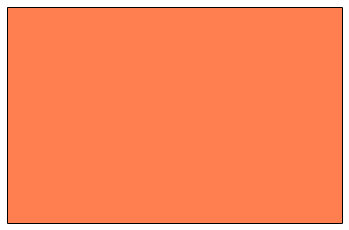

In [19]:
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()
 

In [10]:
map.show()

AttributeError: 'Basemap' object has no attribute 'show'

In [17]:
plt.show()


At this point, I have realized that the zoom level is too much. It is not capable of producing any detail, like roads or railways or lakes, at this small scale. But I can't yet let go of this module, as it can properly convert *lat-long coordinates to pixels*. So, I have searched the documentation further and hit upon this beautiful option: [Image masking](http://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap.warpimage). It basically lets you add a background while operating on the basemap. So, we get the best of both worlds now.

So, to obtain the high-res backgrounds, I have searched again, and stumbled upon a previously thought out but rejected solution. The **Static Google Maps**. This is [Google Maps API](https://developers.google.com/maps/documentation/static-maps/ "Title") that lets you download static PNGs/SVGs instead of a web element. This [Python Library GOOMPY](https://github.com/kostas-alexis/GooMPy) seems to be the python wrapper to the JS API. So testing this out now.


In [23]:
from goompy import GooMPy



Another small notable point, is that the tiling works by generating a map *around a center point.* So we try to generate four maps and join their quarters to get our map. 

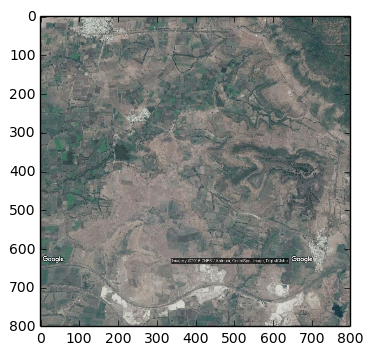

In [77]:
WIDTH = 800
HEIGHT = 800

LATITUDE  =  17.299223
LONGITUDE = 77.836461
ZOOM = 15
MAPTYPE = 'satellite'
goompy = GooMPy(WIDTH, HEIGHT, LATITUDE, LONGITUDE, ZOOM, MAPTYPE)
a = goompy.getImage()
plt.imshow(np.asarray(a))
ll = np.asarray(a)
plt.imshow(ll)


The previous one was bottom left.
For top left: 

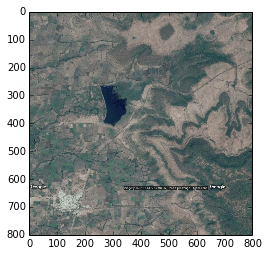

In [45]:
WIDTH = 800
HEIGHT = 800

LATITUDE  =  17.326264
LONGITUDE = 77.836461
ZOOM = 15
MAPTYPE = 'satellite'
goompy = GooMPy(WIDTH, HEIGHT, LATITUDE, LONGITUDE, ZOOM, MAPTYPE)
a = goompy.getImage()
ul = np.asarray(a)


plt.imshow(ul)

Top right now:

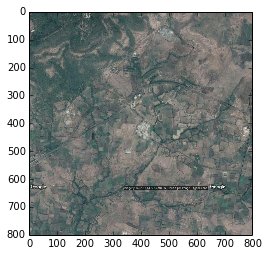

In [46]:
WIDTH = 800
HEIGHT = 800

LATITUDE  =  17.326264
LONGITUDE = 77.880320
ZOOM = 15
MAPTYPE = 'satellite'
goompy = GooMPy(WIDTH, HEIGHT, LATITUDE, LONGITUDE, ZOOM, MAPTYPE)
a = goompy.getImage()
ur = np.asarray(a)



plt.imshow(ur)

Bottom right now:

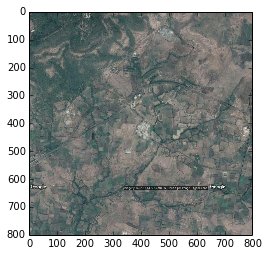

In [48]:
H = 800
HEIGHT = 800

LATITUDE  =  17.299223
LONGITUDE = 77.880320
ZOOM = 15
MAPTYPE = 'satellite'
goompy = GooMPy(WIDTH, HEIGHT, LATITUDE, LONGITUDE, ZOOM, MAPTYPE)
a = goompy.getImage()


lr = np.asarray(a)
plt.imshow(lr)

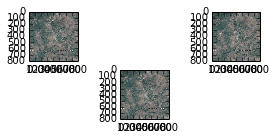

In [50]:
plt.figure()
plt.subplot(4,1,1)
plt.imshow(ul)
plt.subplot(4,1,2)
plt.imshow(ur)
plt.subplot(4,2,1)
plt.imshow(ll)
plt.subplot(4,2,2)
plt.imshow(lr)
plt.show()

In [52]:
np.shape(ul)

(800, 800, 3)

In [53]:
newimage = np.zeros_like(ul)

In [54]:
newimage[0:400,0:400,:] =ul[400::,400::,:] 

In [55]:
newimage[0:400,400::,:] =ur[400::,0:400,:] 

In [56]:
newimage[400::,400::,:] = lr[0:400,0:400,:]

In [57]:
newimage[400::,0:400,:] = ll[0:400,400::,:]

In [59]:
plt.rc("savefig", dpi=100)

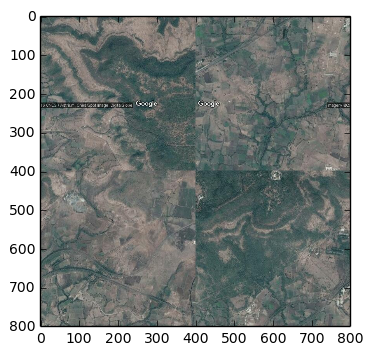

In [60]:
plt.imshow(newimage)

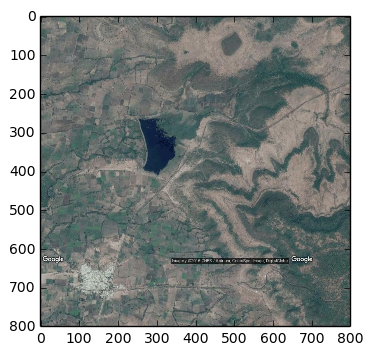

In [64]:
plt.imshow(ul)
plt.show()

Clearly, the 800 by 800 pixel blocks aren't as wide as expected. So, the next plan is to increase the size and then stitxh them all together, first. Then trim the excess off to get what we wanted.

In [71]:
WIDTH = 1200
HEIGHT = 1200

LATITUDE  =  17.326264
LONGITUDE = 77.836461
ZOOM = 15
MAPTYPE = 'satellite'
goompy = GooMPy(WIDTH, HEIGHT, LATITUDE, LONGITUDE, ZOOM, MAPTYPE)
a = goompy.getImage()
ul = np.asarray(a)


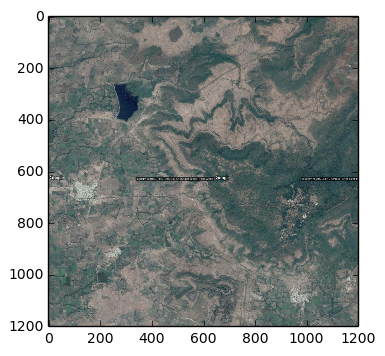

In [72]:
plt.imshow(ul)

In [68]:
ul.shape?


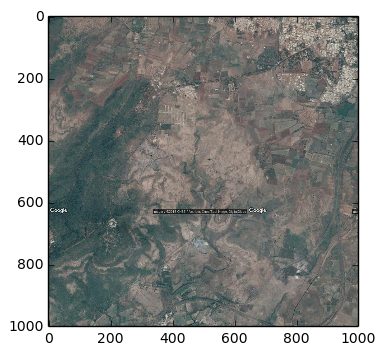

In [73]:
WIDTH = 1000
HEIGHT = 1000

LATITUDE  =  17.326264
LONGITUDE = 77.880320
ZOOM = 15
MAPTYPE = 'satellite'
goompy = GooMPy(WIDTH, HEIGHT, LATITUDE, LONGITUDE, ZOOM, MAPTYPE)
a = goompy.getImage()
ur = np.asarray(a)
plt.imshow(ur)


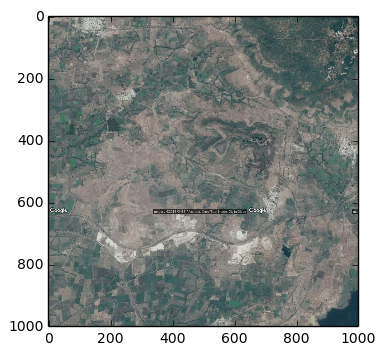

In [75]:
WIDTH = 1000
HEIGHT = 1000

LATITUDE  =  17.299223
LONGITUDE = 77.836461
ZOOM = 15
MAPTYPE = 'satellite'
goompy = GooMPy(WIDTH, HEIGHT, LATITUDE, LONGITUDE, ZOOM, MAPTYPE)
a = goompy.getImage()
ll = np.asarray(a)
plt.imshow(np.asarray(a))

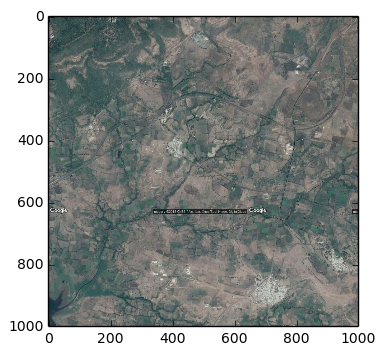

In [76]:
H = 1000
HEIGHT = 1000

LATITUDE  =  17.299223
LONGITUDE = 77.880320
ZOOM = 15
MAPTYPE = 'satellite'
goompy = GooMPy(WIDTH, HEIGHT, LATITUDE, LONGITUDE, ZOOM, MAPTYPE)
a = goompy.getImage()


lr = np.asarray(a)
plt.imshow(lr)

In [78]:
first = lr[:,0]
np.where(ll==first)


(array([], dtype=int64),)

Writing a function to identify overlap necessary for stitching:



In [96]:
def findhorizontal_overlap(l1,l2):
    #arryays L1 and L2 with. It searches along the first dimension.
    indx = 1
    flag = 1
    while flag:
        a1 = l1[-indx:]
        a2 = l2[:indx]
        if np.all(a1==a2):
            flag = 0
        else:
            flag = 1
        indx+=1
        print indx
    return indx-1 #Because we add up before the operation terminates.

        
        
    

In [95]:
l1 = ll[20]
l2 = lr[20]
l1.shape

(800, 3)

In [ ]:
findhorizontal_overlap(l1,l2)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

In [102]:
plt.imsave('ul.png',ul)
plt.imsave('ur.png',ur)
plt.imsave('ll.png',ll)
plt.imsave('lr.png',lr)

In [101]:
plt.imsave?


# Status Update

Turns out, all attempts are failing badly. When I viewed these pictures on the screen outside Ipython, their resolution and clarity sucked. Not at all enough for my application. And the stitching code just fails. There seems to be little overlap between these two. It seems messy and complicated. 

After a little more searching, I came across [this library GMplot](https://github.com/vgm64/gmplot/blob/master/gmplot/gmplot.py#L38). This can plot any cordinate required on google maps, very likely only the street type maps and not satellite or terrain. But lets see what it can do. 

# Final Resort:
 
That was an HTML embedded map. Not for my purpose. So, I will try to refashion this thing. 
After reading up a lot about static maps, I found this. Specifically, I found how tiles are derived from the database. Here is the [Link](https://developers.google.com/maps/documentation/javascript/maptypes#OverlayMapTypes) explaining it all. 

So you basically need to know which tiles at which zoom level you need. And then, by making a program, that can actually reverse-get (because there is no interface to getting tiles. It's all imaginary) required tiles. 


In [ ]:
def decodeTileLatLong(zoom,tile):
    maxzoom = 21
    _validrequest = False
    _validrequest = True if zoom<=maxzoom else False
    if not(_validrequest):
        raise Exception('In valid zoom value. Should be between 0 and 21')
        break
    maxtileindx = math.pow(2,zoom)
    _validrequest = True if np.all(tileloc<maxtileindx) else False
    if not(_validrequest):
        raise Exception('Invalid tile location for the specified zoom value.')
        break
    
    

In [1]:
TILE_SIZE = 256
MAX_ZOOM = 21

In [9]:
def projectToMerc((lat,lon)):
#     pdb.set_trace()
    #Copied from https://developers.google.com/maps/documentation/javascript/examples/map-coordinates
    siny = np.sin(lat*np.pi/180)
    siny = np.min(np.max(siny,-0.9999),0.9999)
    mercpoint =  np.array((0.5 + (lon/360), 0.5 - ((np.log((1+siny)/(1-siny)))/(4*np.pi))),dtype=float)
    print mercpoint
    return mercpoint*TILE_SIZE
    #Works!



In [20]:
ans = projectToMerc((41.850, -87.650))

> <ipython-input-18-d79c4f1458ac>(3)projectToMerc()
-> TILESIZE = 256
(Pdb) c
[ 0.25652778  0.37177706]


In [3]:

import numpy as np

In [25]:
print '{0:.16f}'.format(ans[1])

95.1749265469740919


In [5]:
def PixelCordinate((lat,lon),zoom):
    #Returns the pixel coordinate of a certain point at the required zoom level.
    (worldX,worldY) = projectToMerc((lat,lon))
    _validrequest = False
    _validrequest = True if zoom<=MAX_ZOOM else False
    if _validrequest:
        xcord = np.floor(worldX*np.power(2,zoom))
        ycord = np.floor(worldY*np.power(2,zoom))
        return np.asarray((xcord,ycord),dtype=int)
    else:
        raise ValueError('Invalid zoom value. Must be under 21.')
        return
    
        
        
    
    

In [14]:
PixelCordinate((41.850, -87.650),30)

> <ipython-input-1-31d328fde047>(3)projectToMerc()
-> TILESIZE = 256
(Pdb) c
[ 0.25652778  0.37177706]


Exception: Invalid zoom value. Must be under 21.

In [2]:
def TileCordinate((lat,lon),zoom):
    #Returns cordinates of the tile involving the latitude and longitude at that zoom level
    
        
    (worldX,worldY) = projectToMerc((lat,lon))
   
    _validrequest = False
    _validrequest = True if zoom<=MAX_ZOOM else False
    if _validrequest:
        xtile = np.floor(worldX*np.power(2,zoom)/TILE_SIZE)
        ytile = np.floor(worldY*np.power(2,zoom)/TILE_SIZE)
        return np.asarray((xtile,ytile),dtype=int)
    else:
        raise ValueError('Invalid zoom value. Must be under 21.')
        return
    
    
    

In [11]:
TileCordinate((41.850, -87.650),4)

[ 0.25652778  0.37177706]


array([5, 4])